In [1]:
import numpy as np
import math
from scipy.special import comb
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise 1
### (b) 
Come up with a general formula to calculate and/or code
a simulation for the probability that c doctors with competence p
make the correct decision by majority voting. Use it to calculate the
probability of a correct decision for the group of medical students.

### Condorcet's Jury Theorem:

$P(N,p) = \sum_{k = \frac{N}{2}}^{N} \binom{N}{k}\cdot p^k \cdot (1-p)^{N-k}$, where the probability of the right choice is $p$ and $N$ is the number of voters. Additonially, we assume that $k>2$ and that $k$ is odd to avoid ties. The theorem states if the voters are independent and the probability of voting for the correct choice for each voter is $p>0.5$, then the probability of the majority vote for the correct choice is larger than $p$ and converges to one as the population $N$ goes to infinity.

In [68]:
c = 19
p = 0.6

def PcorrectMajority(c,p):
    q = 0.0
    for k in range(math.ceil(c/2),c+1):
        q = q + (comb(c, k, exact=False) * (p**k) * (1-p)**(c-k))
    return q

print("p(19,0.6) = ", PcorrectMajority(c,p))

p(19,0.6) =  0.8139079785845882


### (c) 
Make a graph of the probability of a correct decision for
various sizes of the jury and different competence levels (p) of the
individual doctors.

In [3]:
def createProbMatrix(Cs, Ps):
    graph = np.empty([len(Cs), len(Ps)])
    for i in range(0,len(Cs)):
        for j in range(0,len(Ps)):
            graph[i][j] = PcorrectMajority(Cs[i], Ps[j])
    return graph

In [4]:
def plotHeatmap(x, y, xy):
    fig, ax = plt.subplots()
    im = ax.imshow(xy, aspect='auto')

    # Set ticks
    ax.set_xticks(np.arange(len(x)))
    ax.set_yticks(np.arange(len(y)))
    
    # label them 
    ax.set_xticklabels(list(map('{:.2f}'.format,x)))
    ax.set_yticklabels(y)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    
    ax.set_xticks(np.arange(xy.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(xy.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
        
    # Create text annotations
    for i in range(len(y)):
        for j in range(len(x)):
            text = ax.text(j, i, "{:.2f}".format(xy[i, j]),
                           ha="center", va="center", color="w")

    ax.set_title("Probabilities of a correct decisions")
    ax.set_xlabel("Competence level p")
    ax.set_ylabel("Jury size c")
    fig.tight_layout()
    # plt.savefig('heatmapEx1c.png')
    plt.show()

In [5]:
def heatmapCorrectDecision(minC, maxC, stepC, minP, maxP, stepP):
    Cs = range(minC, maxC + stepC , stepC)
    Ps = np.arange(minP, maxP + stepP, stepP)
    graph = createProbMatrix(Cs, Ps)
    plotHeatmap(Ps, Cs, graph)

In [18]:
def graphSizeCorrectDecision(minC, maxC, stepC, p, hlineY = None):
    Cs = range(minC, maxC + stepC, stepC)
    probs = np.empty([len(Cs), 1])
    for i in range(0,len(Cs)):
            probs[i] = PcorrectMajority(Cs[i], p)
    plt.plot(Cs, probs)
    plt.xlabel('Jury size c')
    plt.xticks(Cs)
    plt.ylabel('Competence level p')
    plt.title("Probabilities of a correct decisions with varying c")
    if hlineY is not None:
        plt.axhline(y=hlineY, color='r', linestyle='-')
    # plt.savefig('ex1d.png')
    plt.show()
    
def graphCompetenceCorrectDecision(minP, maxP, stepP, c):
    Ps = np.arange(minP, maxP + stepP, stepP)
    probs = np.empty([len(Ps), 1])
    for i in range(0,len(Ps)):
            probs[i] = PcorrectMajority(c, Ps[i])
    plt.plot(Ps, probs)
    plt.xlabel('Competence level p')
    plt.ylabel('Jury size c')
    plt.title("Probabilities of a correct decisions with varying p")
    # plt.savefig('ex1d.png')
    plt.show()

Creating multiple graphs with varying jury size and competence levels

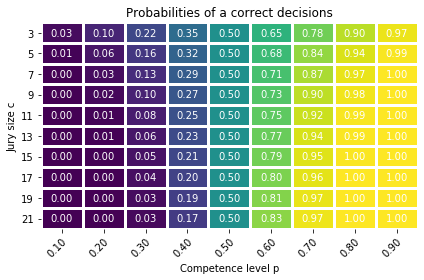

In [14]:
heatmapCorrectDecision(3, 21, 2, 0.1, 0.9, 0.1)

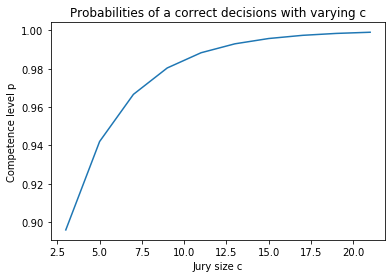

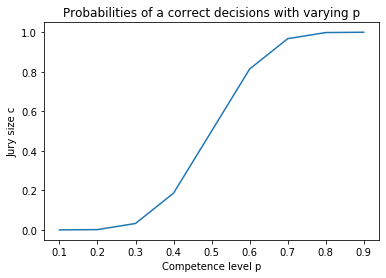

In [8]:
graphSizeCorrectDecision(3, 21, 2, 0.8)
graphCompetenceCorrectDecision(0.1, 0.9, 0.1, 19)

### (d)
Who has the highest chance to make the correct decision:
the radiologist, the group of doctors or the group of students? How
big does the group of medical students need to be to make the probability
of a correct decision (almost) equal to the prediction of the
group of doctors?

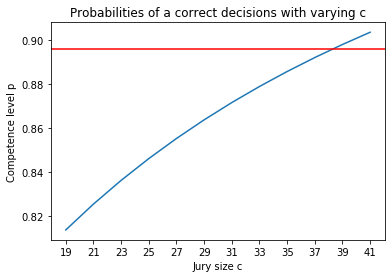

In [17]:
graphSizeCorrectDecision(19, 41, 2, 0.6, PcorrectMajority(3, 0.8))

# Exercise 3
### (a) 
Suppose that we combine the strong classifier in an ensemble
with the 10 weak classifiers. What is the probability of a
correct decision in a majority vote if each classifier’s vote has the
same weight? Is the combined prediction better than that of the
strong classifier alone?

In [2]:
def correct_majority_vote_ensemble(N, p_weak, p_strong):
    """
    Compute probability of an unweighted correct majority vote for 
    an ensemble of N-1 weak classifiers and 1 strong classifier.
    """
    N_weak = N - 1
    cum_prob = 0.0
      
    majority = int(N/2) + 1 if N % 2 == 0 else int((N+1) / 2)
    
    # correct majority with only weak classifiers   
    for k in range(majority, N):
        cum_prob += comb(N_weak, k) * p_weak**k * (1-p_weak)**(N_weak-k) * (1 - p_strong)
        
    # correct majority with weak classifiers and one strong classifier  
    for k in range(majority-1, N):
        cum_prob += comb(N_weak, k) * p_weak**(k) * (1-p_weak)**(N_weak-k) * p_strong
        
    return cum_prob
            
p_correct = correct_majority_vote_ensemble(11, 0.6, 0.85)       
print("Probability of correct majority vote:\n", p_correct)

Probability of correct majority vote:
 0.8036626636800001


**Answer:** We can use the formula from exercise 1b to calculate the probability of a correct decision in a majority vote. A singular strong classifier is better than the unweighted combined prediction of the ensemble in this case ($P_{strong} = 0.85 > P_{ensemble} \approx 0.80$).

### (b)
Instead of using an equal-weight majority vote, we can use
a weighted majority vote in which the strong classifier has a larger
weight. Implement a function that computes, for a given weight w
for the strong classifier, the probability that the weighted majority
vote results in the correct decision. Make a graph of the probability
of a correct decision given different weights. What is the optimal
weight for the strong classifier?

In [3]:
def weighted_correct_majority_vote_ensemble(N, p_weak, p_strong, w_strong=1):
    """
    Compute probability of a weighted correct majority vote for 
    an ensemble of N-1 weak classifiers and 1 strong classifier.
    Ties are handled with a coin flip, i.e., with probability 0.5
    the tie will go in favor of the correct decision.
    """
    N_weak = N - 1
    cum_prob = 0.0
      
    n_votes = N_weak + w_strong
    is_tied = n_votes % 2 == 0
    
    majority = n_votes / 2
    majority_only_weak = math.floor(majority) + 1 if is_tied else math.ceil(majority)
    majority_with_strong = max(0, math.floor(majority - w_strong) + 1 if is_tied else math.ceil(majority - w_strong)) 
    
    # correct majority with only weak classifiers   
    for k in range(majority_only_weak, N):
        cum_prob += comb(N_weak, k) * p_weak**k * (1-p_weak)**(N_weak-k) * (1 - p_strong)
        
    # correct majority with weak classifiers and one strong classifier  
    for k in range(majority_with_strong, N):
        cum_prob += comb(N_weak, k) * p_weak**(k) * (1-p_weak)**(N_weak-k) * p_strong
    
    # add probability of a tie going in favor of the correct decision
    if is_tied:
        tied_only_weak = majority_only_weak - 1
        tied_with_strong = majority_with_strong - 1
        cum_prob += 0.5 * comb(N_weak, tied_only_weak) * p_weak**k * (1-p_weak)**(N_weak-tied_only_weak) * (1 - p_strong)
        cum_prob += 0.5 * comb(N_weak, tied_with_strong) * p_weak**(tied_with_strong) * (1-p_weak)**(N_weak-tied_with_strong) * p_strong
        
    return cum_prob

In [4]:
weights = np.arange(0, 13, 1)
p_weighted = [weighted_correct_majority_vote_ensemble(11, 0.6, 0.85, w) for w in weights]
opt_weight = np.argmax(p_weighted)
print("Optimal weight: w =", weights[opt_weight])

Optimal weight: w = 5


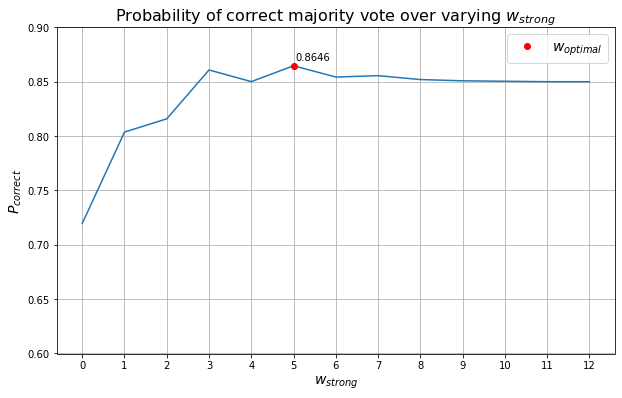

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(weights, p_weighted)
plt.plot(weights[opt_weight], p_weighted[opt_weight], "ro", label="$w_{optimal}$")
plt.annotate(f"{p_weighted[opt_weight]:.4f}", (weights[opt_weight] + 0.05, p_weighted[opt_weight] + 0.005))
plt.xlabel("$w_{strong}$", size=14)
plt.ylabel("$P_{correct}$", size=14)
plt.title("Probability of correct majority vote over varying $w_{strong}$", size=16)
plt.xticks(weights)
plt.ylim(0.6, 0.9)
plt.grid()
plt.legend(prop={'size': 14})
# plt.savefig("Figures/ex3b")
plt.show()

### (c)
The AdaBoost.M1 algorithm provides a formula to compute
the classifier weights based on their error on the training set.
Use the expected errors of the strong and weak classifiers to compute
their respective weights. Compare the answer to the answer
you found in the previous question.

In [7]:
def adaboost_M1_weight(err):
    return np.log((1-err) / err)

# Weak classifier
# p_correct = 0.6 -> p_error = 0.4
w_weak = adaboost_M1_weight(0.4)
print("w_weak =", w_weak)

# Strong classifier
# p_correct = 0.85 -> p_error = 0.15
w_strong = adaboost_M1_weight(0.15)
print("w_strong = ", w_strong)

print("Relative (w_strong/w_weak):", w_strong / w_weak)

w_weak = 0.4054651081081642
w_strong =  1.7346010553881064
Relative (w_strong/w_weak): 4.278052588745501


**Answer:** Adaboost.M1 algorithm formula to compute the classifier weights based on their error on the training set is the following:
$$w_m = \log\left(\frac{1 - err_m}{err_m}\right)$$
, where $m$ is the model.

### (d)
Plot the weight given to a base-learner in the AdaBoost
algorithm for different values of the error the base-learner makes.
Explain what you see. What does it mean for these weights if we assume the base-learners are weak-learners? What happens to the
weights if the probability of error of the base-learner is > 0.5 and
why?

In [8]:
errors = np.linspace(1e-6, 1, 1000, endpoint=False)
weights = [adaboost_M1_weight(e) for e in errors]

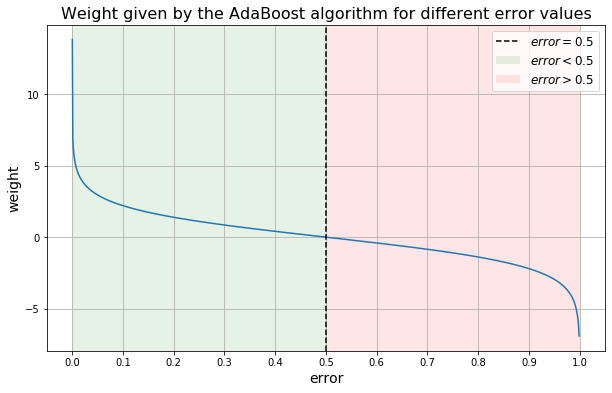

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(errors, weights)
plt.axvline(0.5, linestyle='--', c='k', label="$error=0.5$")
plt.axvspan(0, 0.5, facecolor='g', alpha=0.1, label='$error<0.5$')
plt.axvspan(0.5, 1.0, facecolor='r', alpha=0.1, label='$error>0.5$')
plt.xlabel("error", size=14)
plt.ylabel("weight", size=14)
plt.title("Weight given by the AdaBoost algorithm for different error values", size=16)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.legend(prop={'size': 12})
# plt.savefig("Figures/ex3d.png")
plt.show()

# Exercise 5
